In [104]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy.stats import t

In [91]:
engagement = np.loadtxt('engagement.csv')
mean = np.mean(engagement)
std = np.std(engagement)
print("""
Population mean: %.5f
Population std: %.5f
Population size: %i
"""%(mean, std, len(engagement)))


Population mean: 0.07727
Population std: 0.10721
Population size: 8702



Text(0.5, 1.0, 'original engagement distribution')

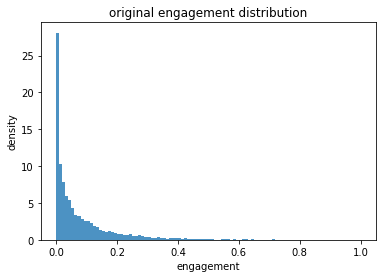

In [105]:
plt.hist(engagement, bins=100, alpha=0.8, density=True)
plt.xlabel("engagement")
plt.ylabel("density")
plt.title("original engagement distribution")

`np.random.choice(5, 3)` : Generate a uniform random sample from np.arange(5) of size 3:
=This is equivalent to np.random.randint(0,5,3)

In [124]:
sample_size=50
n_trials=10000
#draw 10000 samples, each of size 50
samples=np.array([np.random.choice(engagement,sample_size,replace=False) for i in range(n_trials)]) #repeat for x time

In [101]:
# calculate sample mean for each sample
means = samples.mean(axis=1)
# mean of sampling distribution
sample_mean = np.mean(means)
# empirical standard error  
sample_std = np.std(means)
# standard error
analytical_std = std / np.sqrt(sample_size)
print("""
sampling distribution mean: %.5f
sampling distribution std: %.5f
analytical std: %.5f
"""%(sample_mean, sample_std, analytical_std))


sampling distribution mean: 0.07709
sampling distribution std: 0.01509
analytical std: 0.01516



lower tail: 1.40%
upper tail: 3.39%


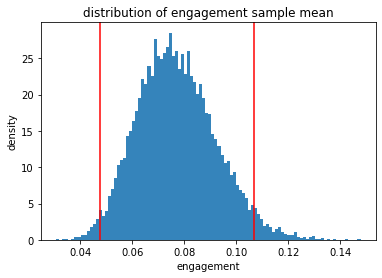

In [111]:
plt.hist(means,bins=100,alpha=0.9, density=True)
#two vertical lines marking the 1.96 standard error above and below the mean. 
z = 1.96
plt.axvline(sample_mean - 1.96 * sample_std, color='r')
plt.axvline(sample_mean + 1.96 * sample_std, color='r')
plt.xlabel("engagement")
plt.ylabel("density")
plt.title("distribution of engagement sample mean")

print("lower tail: %.2f%%"%(100 * sum(means < sample_mean - 1.96 * sample_std) / len(means)))
print("upper tail: %.2f%%"%(100 * sum(means > sample_mean + 1.96 * sample_std) / len(means)))

Sampling distribution looks very normal.

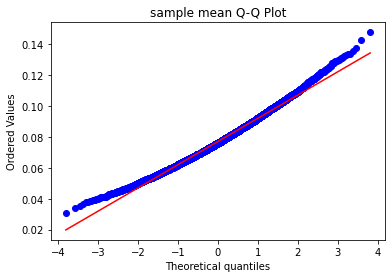

In [114]:
# QQ plot confirms tendency toward normal distribution.
import pylab 
import scipy.stats as stats
stats.probplot(means,dist='norm',plot=pylab)
plt.title("sample mean Q-Q Plot")
pylab.show()

### A Frequentist Simulation

In [119]:
# make 95% confidence interval
z = 1.96
se=samples.std(axis=1)/np.sqrt(sample_size)
ups = means + z * se
los = means - z * se
success = np.mean((mean >= los) & (mean <= ups))
fpr = np.mean((mean < los) | (mean > ups))
print("False positive rate: %.3f"%fpr)

False positive rate: 0.086


It turns out that 91.4% of the confidence intervals capture the population mean. This is what confidence interval really means: if we repeat the sampling procedures infinitely many times, about 95% of the confidence intervals will contain the population mean.

In other words, approximately 5% of the confidence intervals fail to capture the population mean. In the graph below, this happens when the blue dots (upper bound) cross below the population mean, or when orange dots (lower bound) cross above the population mean.

Text(0, 0.5, 'sample_mean')

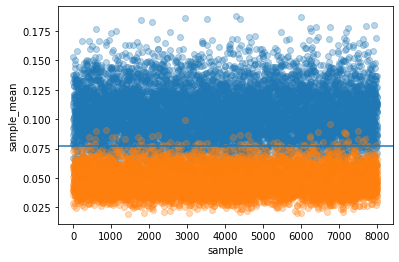

In [120]:
n_points = 8000

# plt.figure(figsize=(14, 6))
plt.scatter(list(range(len(ups[:n_points]))), ups[:n_points], alpha=0.3)
plt.scatter(list(range(len(los[:n_points]))), los[:n_points], alpha=0.3)
plt.axhline(y=0.07727)

plt.xlabel("sample")
plt.ylabel("sample_mean")